# Лабораторная работа №1

## 1.1 Оценки математического ожидания, дисперсии, медианы

## Задание 1

### а) Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата ξ. Привести в отчет.

Дана плотность случайной величины:

$$
f_\xi(x) = \theta^2 x e^{-\theta x}, \qquad x \ge 0.
$$

Это гамма распределение, где shape $(k = 2$), а параметр интенсивности (rate) равен $(\theta$).

Для гамма-распределения справедливы формулы:

$$
\mathbb{E}[X] = \frac{k}{\theta}, \qquad 
\mathrm{Var}(X) = \frac{k}{\theta^2}.
$$

Подставляем \(k = 2\):

**Математическое ожидание**
$$
{\mathbb{E}[\xi] = \frac{2}{\theta}}
$$

**Дисперсия**
$$
{\mathrm{Var}(\xi)=\frac{2}{\theta^2}}
$$

**Математическое ожидание квадрата**

$$
\mathbb{E}[X^2] = \mathrm{Var}(X) + (\mathbb{E}[X])^2.
$$

Тогда:

$$
\mathbb{E}[\xi^2] 
= \frac{2}{\theta^2} + \frac{4}{\theta^2}
= \frac{6}{\theta^2}.
$$

**Таблица для $\theta \in \{0.5, 2, 8\}$**

| $\theta$ | $E[\xi]$ | $D(\xi)$ | $E[\xi^2]$ |
|----------|----------|----------|------------|
| 0.5      | 4.0      | 8.0      | 24.0       |
| 2        | 1.0      | 0.5      | 1.5        |
| 8        | 0.25     | 0.03125  | 0.09375    |


### Пункт b

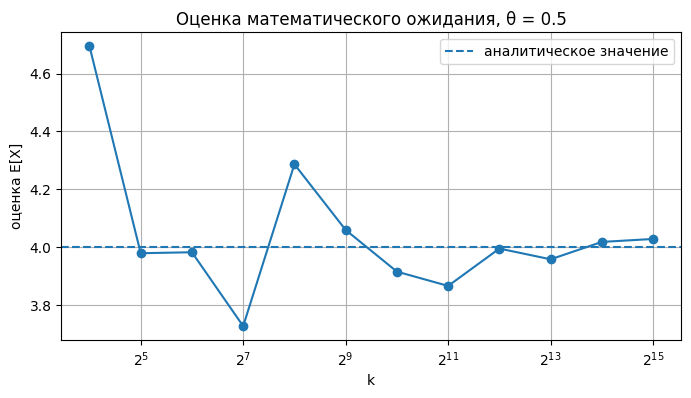

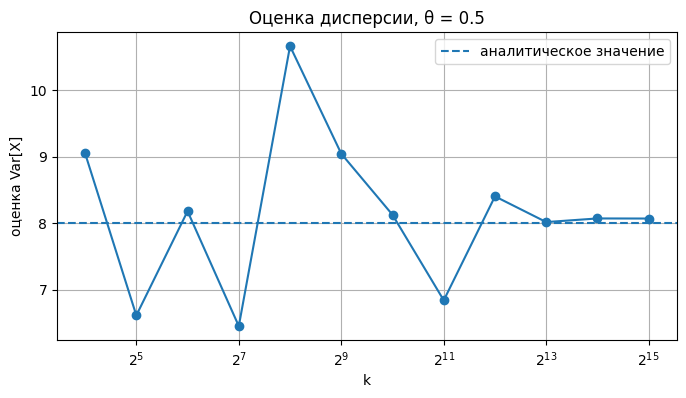

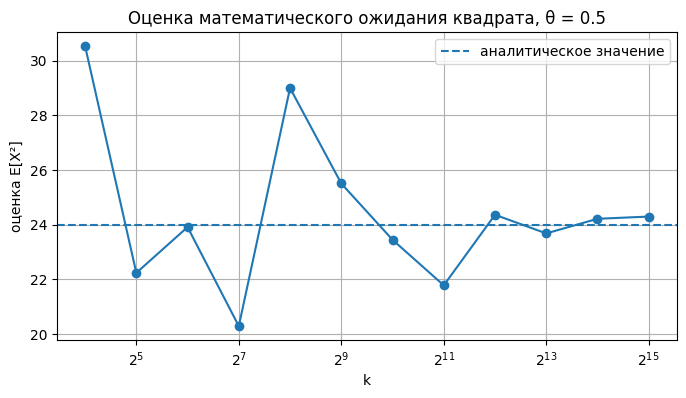

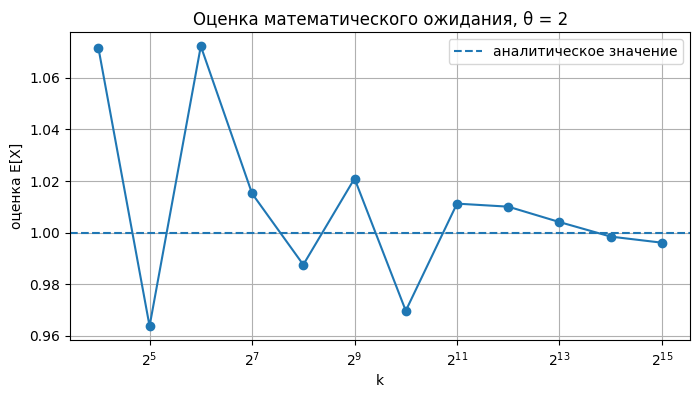

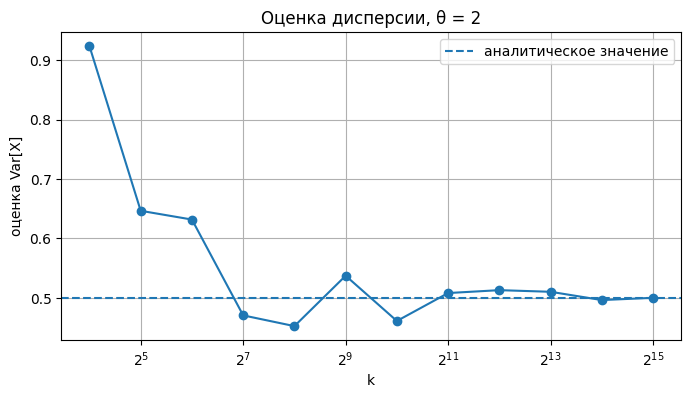

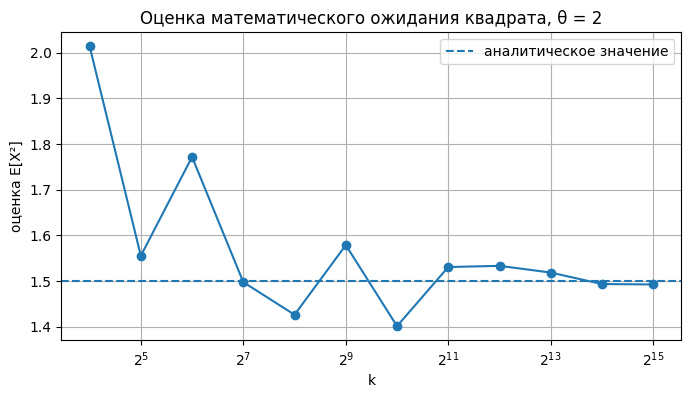

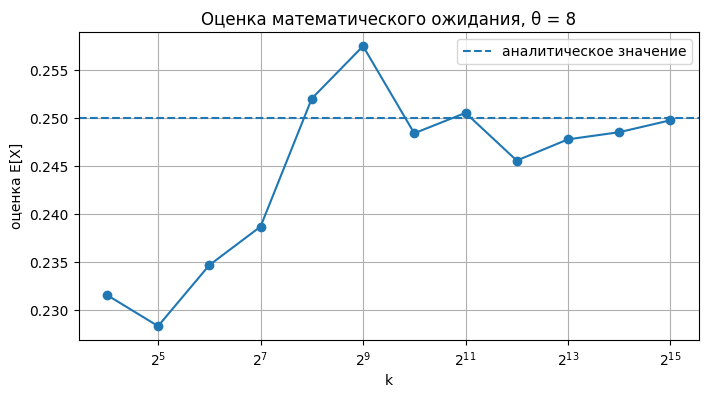

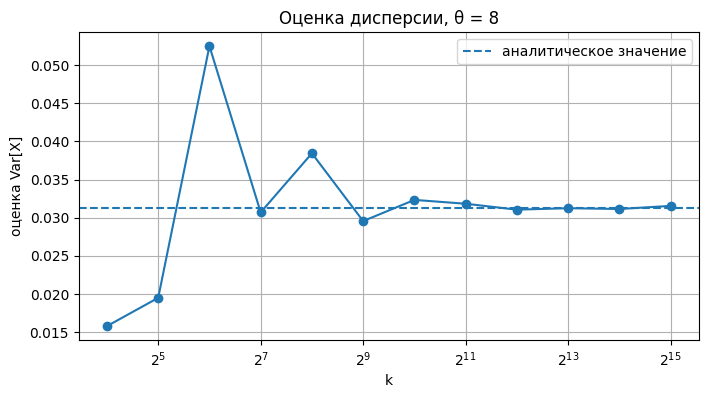

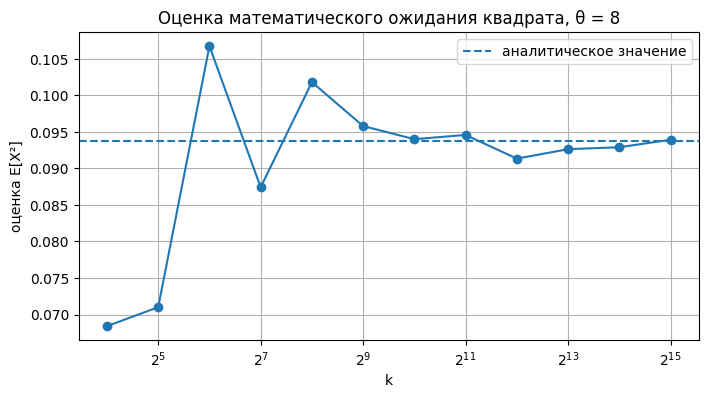

In [5]:
import numpy as np
import matplotlib.pyplot as plt

thetas = [0.5, 2, 8]

ks = [2**i for i in range(4, 16)]

def analytic_values(theta):
    """Аналитические значения E[X], Var[X], E[X^2]."""
    E = 2 / theta
    Var = 2 / theta**2
    E2 = 6 / theta**2
    return E, Var, E2


# цикл по θ
for theta in thetas:
    mean_est = []
    var_est = []
    mean_sq_est = []

    E_true, Var_true, E2_true = analytic_values(theta)

    # цикл по k
    for k in ks:
        sample = np.random.gamma(shape=2, scale=1/theta, size=k)

        mean_est.append(np.mean(sample))
        var_est.append(np.var(sample, ddof=1))  # несмещённая дисперсия
        mean_sq_est.append(np.mean(sample**2))

    # 1) E[X] 
    plt.figure(figsize=(8, 4))
    plt.plot(ks, mean_est, marker='o')
    plt.axhline(E_true, linestyle='--', label='аналитическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('k')
    plt.ylabel('оценка E[X]')
    plt.title(f'Оценка математического ожидания, θ = {theta}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # 2) Var[X]
    plt.figure(figsize=(8, 4))
    plt.plot(ks, var_est, marker='o')
    plt.axhline(Var_true, linestyle='--', label='аналитическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('k')
    plt.ylabel('оценка Var[X]')
    plt.title(f'Оценка дисперсии, θ = {theta}')
    plt.grid(True)
    plt.legend()
    plt.show()

    # 3) E[X^2]
    plt.figure(figsize=(8, 4))
    plt.plot(ks, mean_sq_est, marker='o')
    plt.axhline(E2_true, linestyle='--', label='аналитическое значение')
    plt.xscale('log', base=2)
    plt.xlabel('k')
    plt.ylabel('оценка E[X²]')
    plt.title(f'Оценка математического ожидания квадрата, θ = {theta}')
    plt.grid(True)
    plt.legend()
    plt.show()


## Задание 2